<a href="https://colab.research.google.com/github/rishiraj09/pytorch-tutorial/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [26]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # Hidden Layer2 (number of neurons) -->
  # Output (3 classess of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [27]:
# Pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(url)

In [30]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
# change last column from strings to integers
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

/tmp/ipython-input-3510651027.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [32]:
# Train Test Split. Set X,y

X = my_df.drop('species', axis=1).values
y = my_df['species'].values

In [33]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [34]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [36]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [37]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [38]:
# Set the criterion of model to meaaure the error, how far off the prediction are from
criterion = nn.CrossEntropyLoss()

# Choose Adam optimizer, lr -> learning rate (if error doesn't go down after a bunch of iterations)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [39]:
# Train our model
# Epochs? (One run thru all the training data in our network)

epochs = 100
losses = []

for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train value

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i % 10 == 0:
    print(f"Epoch:{i} and loss: {loss}")

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # through the network of fine tune the weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch:0 and loss: 1.1251550912857056
Epoch:10 and loss: 1.0096259117126465
Epoch:20 and loss: 0.8157405853271484
Epoch:30 and loss: 0.585706353187561
Epoch:40 and loss: 0.3999636471271515
Epoch:50 and loss: 0.26768800616264343
Epoch:60 and loss: 0.17942361533641815
Epoch:70 and loss: 0.12151690572500229
Epoch:80 and loss: 0.0860118493437767
Epoch:90 and loss: 0.06520850956439972


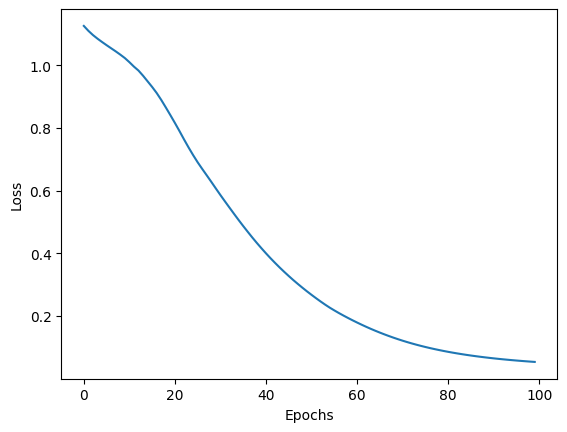

In [40]:
# Graph it out
plt.plot(range(epochs),losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [41]:
# Evaluate model on Test Data set (validate model on test set)

with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [42]:
loss

tensor(0.1315)

In [47]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if(y_test[i]) == 0:
      x = "Setosa"
    elif(y_test[i]) == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    # Will tell us what type of flower class our etwork thinks it is
    print(f'{i+1} | {str(y_val)} \t {x} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f"We got {correct} out of {len(y_test)} correct")

1 | tensor([-5.8760,  4.4628,  6.5124]) 	 Virginica 	 2
2 | tensor([-7.5436,  4.1670,  9.7255]) 	 Virginica 	 2
3 | tensor([-8.4504,  5.1271, 10.1987]) 	 Virginica 	 2
4 | tensor([-4.3398,  5.6267,  2.5608]) 	 Versicolor 	 1
5 | tensor([-7.1825,  4.8754,  8.2992]) 	 Virginica 	 2
6 | tensor([-3.3974,  5.3463,  1.2803]) 	 Versicolor 	 1
7 | tensor([-5.9231,  4.9822,  5.9997]) 	 Virginica 	 2
8 | tensor([-4.2881,  5.7003,  2.3889]) 	 Versicolor 	 1
9 | tensor([-6.5356,  4.9257,  7.1260]) 	 Virginica 	 2
10 | tensor([-8.0509,  4.4129, 10.3286]) 	 Virginica 	 2
11 | tensor([-5.6762,  4.9500,  5.6215]) 	 Virginica 	 2
12 | tensor([ 4.5662, -2.2476, -2.8911]) 	 Setosa 	 0
13 | tensor([ 4.2571, -1.9967, -2.7330]) 	 Setosa 	 0
14 | tensor([-2.1108,  4.0515,  0.5799]) 	 Versicolor 	 1
15 | tensor([ 3.4575, -1.2098, -2.3514]) 	 Setosa 	 0
16 | tensor([-5.4724,  5.1165,  5.0934]) 	 Virginica 	 1
17 | tensor([ 4.0557, -1.7949, -2.6492]) 	 Setosa 	 0
18 | tensor([-5.8075,  4.6053,  6.2458]) 	 Versi

In [48]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [49]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])


In [50]:
# Save our NN Model
torch.save(model.state_dict(), 'iris_nn_model.pt')

In [51]:
# Load the saved Model
model2 = Model()
model2.load_state_dict(torch.load('iris_nn_model.pt'))

<All keys matched successfully>

In [52]:
# Make sure it loaded correctly
model2.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)